# Part of projects

- Classification Model for clothes parts
- Search Engine By Similarty (Style Matching)

In [ ]:
# import packge 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os 
import glob2 as gb
import cv2

In [3]:
# path the folders of the images 
train_path = 'E:\\images\\'

Now i need to know size of the images in all folder 

In [4]:


for folder in os.listdir(train_path):
    files = gb.glob(pathname=str(train_path)+folder+'/*jpg')
    print(f'for traning data , found{len(files)} in folder {folder}')
    

for traning data , found112 in folder pants
for traning data , found112 in folder shirts
for traning data , found112 in folder shoes


In [5]:
# i will use it in future to replace number with the name 
code = {'shirts':0,'shoes':1,'pants':2}
def getcode(n):
    for x,y in code.items():
        if n==y:
            return x

Now in need also to know the most size of images in folder 

In [6]:
size = []
for folder in os.listdir(train_path):
    files = gb.glob(pathname=str(train_path) + folder + '/*jpg')
    for file in files :
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(300, 300, 3)    45
(300, 257, 3)    14
(300, 240, 3)    13
(300, 200, 3)     9
(300, 225, 3)     8
                 ..
(300, 94, 3)      1
(300, 168, 3)     1
(300, 258, 3)     1
(273, 300, 3)     1
(201, 300, 3)     1
Length: 160, dtype: int64

In [9]:

# create input images and output the label name 
x = []
y = []

for folder in os.listdir(train_path):
    files = gb.glob(pathname=str(train_path) + folder + '/*jpg')
    for file in files :
        image = cv2.imread(file)
        image_array = cv2.resize(image,(300,100))
        x.append(list(image_array))
        y.append(code[folder])

(100, 300, 3)
shape of x_train[5] :  (100, 300, 3)
x_train shape : (268, 100, 300, 3)
y_train shape : (268,)


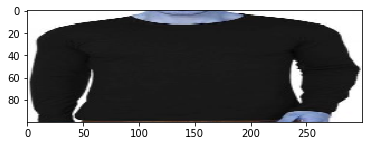

In [10]:
import numpy as np
# split my data 
from sklearn.model_selection import train_test_split 

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2)

# Note my data in list ?! so it list must convert to array 

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)




plt.imshow(x_train[1])
print(x_train[0].shape)
print('shape of x_train[5] : ', x_train[5].shape)
print('x_train shape :' , x_train.shape)
print('y_train shape :' , y_train.shape)

In [11]:
# next step should be normlize image 
x_train , x_test = x_train/255.0 , x_test/255.0
print('sample x_tra[0] : \n ' ,x_train[0])

sample x_tra[0] : 
  [[[0.95294118 0.9372549  0.93333333]
  [0.95294118 0.9372549  0.93333333]
  [0.95294118 0.9372549  0.93333333]
  ...
  [0.8745098  0.86666667 0.8627451 ]
  [0.8745098  0.86666667 0.8627451 ]
  [0.8745098  0.86666667 0.8627451 ]]

 [[0.95294118 0.9372549  0.93333333]
  [0.95294118 0.9372549  0.93333333]
  [0.95294118 0.9372549  0.93333333]
  ...
  [0.87843137 0.87058824 0.86666667]
  [0.87843137 0.87058824 0.86666667]
  [0.87843137 0.87058824 0.86666667]]

 [[0.95294118 0.9372549  0.93333333]
  [0.95294118 0.9372549  0.93333333]
  [0.95294118 0.9372549  0.93333333]
  ...
  [0.88235294 0.8745098  0.87058824]
  [0.88235294 0.8745098  0.87058824]
  [0.88235294 0.8745098  0.87058824]]

 ...

 [[0.94117647 0.93333333 0.93333333]
  [0.94117647 0.93333333 0.93333333]
  [0.94117647 0.93333333 0.93333333]
  ...
  [0.90196078 0.88627451 0.88235294]
  [0.90196078 0.88627451 0.88235294]
  [0.90196078 0.88627451 0.88235294]]

 [[0.9372549  0.92941176 0.92941176]
  [0.9372549  0.

In [12]:
# in the same step convert ouput by using one hot encoding 
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
y_train[0]

array([0., 0., 1.], dtype=float32)

In [13]:
# cangtulration abdo  ^_^ finally create our model 
model = Sequential()
model.add(Conv2D(64,kernel_size = 3 , activation = 'relu',input_shape = (100,300,3)))
model.add(Conv2D(32,kernel_size = 3 , activation = 'relu'))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 298, 64)       1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 296, 32)       18464     
_________________________________________________________________
flatten (Flatten)            (None, 909312)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 2727939   
Total params: 2,748,195
Trainable params: 2,748,195
Non-trainable params: 0
_________________________________________________________________


In [15]:
# compile our model 
model.compile(tf.keras.optimizers.SGD(lr = 0.000001),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [16]:
# fit or train our model 
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs= 20 )

Train on 268 samples, validate on 68 samples
268/268 [==============================] - 31s 116ms/sample - loss: 1.0849 - accuracy: 0.3545 - val_loss: 1.0707 - val_accuracy: 0.4853


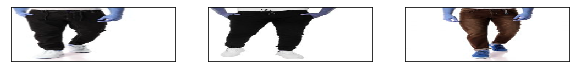

prediction table is :  shirts
prediction table is :  shoes
prediction table is :  pants
true table is : [2 2 2]


In [27]:
# predict 
pred = model.predict(x_test[:3])
prediction = np.argmax(pred,1)

# visulaize

plt.figure(figsize=(10,10))
for i in range(3):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(x_test[i]),cmap = plt.cm.binary)
  
plt.show()

for x in range (3):
    print('prediction table is : ' , getcode(x))

print('true table is :',np.where(y_test[:3]==1)[1])